<a href="https://colab.research.google.com/github/Sudharshana-ps/Week1-Air-Pollution-Risk/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:**

AIR POLLUTION RISK PREDICTION

# **Problem Statement**:
Air pollution poses significant risks to human health, environment, and climate stability.  
Understanding pollutant levels (such as PM2.5, PM10, NO2, SO2, CO, O3) is critical for predicting air quality risks and planning disaster management strategies in urban areas.  


# **Description**:
This project uses an air quality dataset containing multiple pollutants across cities.  
In **Week 1**, we will only focus on exploring the dataset:
- Import necessary libraries  
- Load the dataset in CSV format  
- Explore dataset structure (info, describe, missing values)  

This basic exploration will help us understand pollutant patterns and prepare for advanced modeling in upcoming weeks.

In [9]:

import pandas as pd
import numpy as np


In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd

df = pd.read_csv("air_pollution_data.csv")

print(df.head())


In [ ]:

df.info()


In [ ]:

df.describe()


In [ ]:

df.isnull().sum()


Dataset shape: (10, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10 non-null     object 
 1   City    10 non-null     object 
 2   PM2.5   10 non-null     int64  
 3   PM10    10 non-null     int64  
 4   NO2     10 non-null     int64  
 5   SO2     10 non-null     int64  
 6   CO      10 non-null     float64
 7   AQI     10 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 772.0+ bytes
None

Missing Values:
 Date     0
City     0
PM2.5    0
PM10     0
NO2      0
SO2      0
CO       0
AQI      0
dtype: int64

Summary Statistics:
               Date   City       PM2.5        PM10        NO2        SO2  \
count           10     10   10.000000   10.000000  10.000000  10.000000   
unique          10      5         NaN         NaN        NaN        NaN   
top     2023-01-01  Delhi         NaN         NaN    

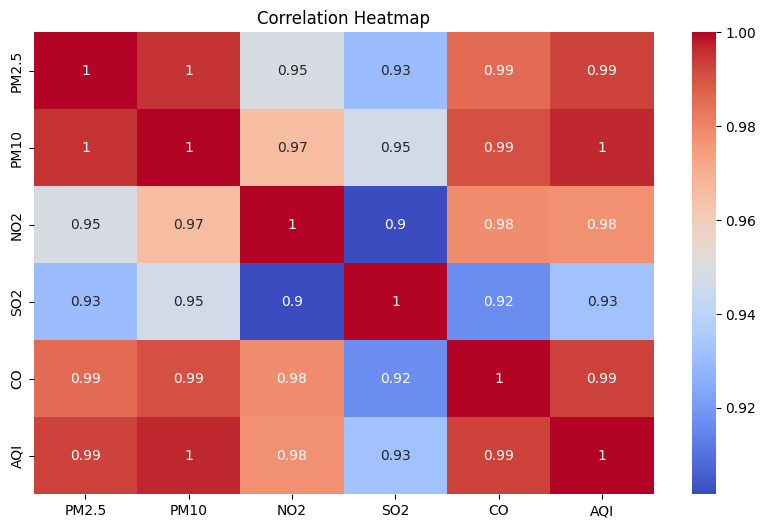

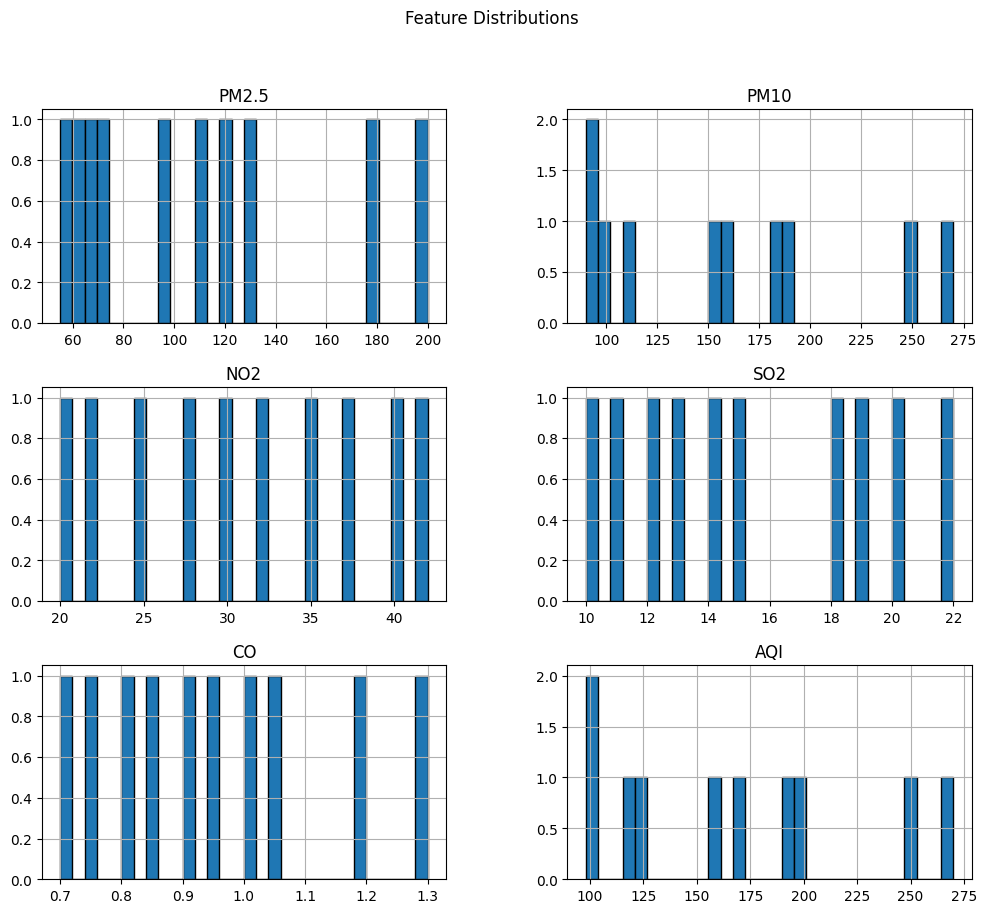

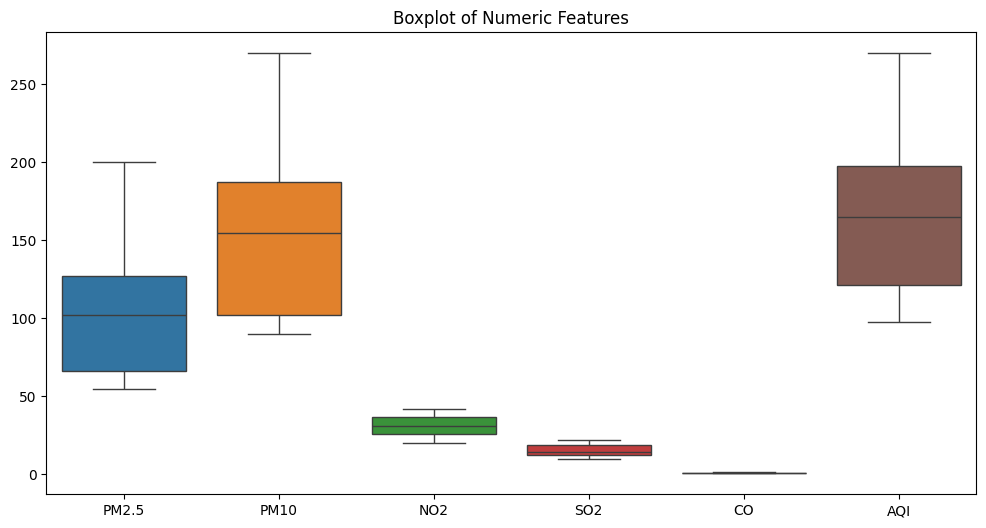


Transformed Data (first 5 rows):
       Date      City     PM2.5      PM10       NO2       SO2        CO  \
0 -1.566699  0.000000  1.495682  1.491392  1.255016  1.178326  1.365896   
1 -1.218544  1.414214 -0.282401 -0.156555 -0.155114 -0.102463 -0.273179   
2 -0.870388 -0.707107 -0.805367 -0.980529 -0.860179 -1.383252 -0.819538   
3 -0.522233  0.707107  0.240564  0.337829  0.549951  0.666010  0.273179   
4 -0.174078 -1.414214 -1.014553 -1.145323 -1.565244 -0.870936 -1.365896   

        AQI  
0  1.435764  
1 -0.145861  
2 -0.848805  
3  0.381347  
4 -1.200277  

Shape after Variance Threshold: (10, 8)

Highly Correlated Features to Drop: ['PM10', 'NO2', 'SO2', 'CO', 'AQI']

Week 2 EDA, Data Transformation, and Feature Selection completed ✅


/tmp/ipython-input-2255164674.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2255164674.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [18]:

# WEEK 2 - Exploratory Data Analysis (EDA), Transformation & Feature Selection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
df = pd.read_csv("air_pollution_data.csv")

#Basic EDA
print("Dataset shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include="all"))
# Correlation Heatmap (numeric features only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
# Distribution of each numeric column
df.hist(figsize=(12,10), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()
# Boxplots for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.title("Boxplot of Numeric Features")
plt.show()
# 2. Data Transformation

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

label_enc = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_enc.fit_transform(df[col])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("\nTransformed Data (first 5 rows):")
print(df_scaled.head())

# 3. Feature Selection
var_thres = VarianceThreshold(threshold=0.01)
df_var = var_thres.fit_transform(df_scaled)
print("\nShape after Variance Threshold:", df_var.shape)

corr_matrix = df_scaled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
drop_cols = [column for column in upper.columns if any(upper[column] > 0.85)]
print("\nHighly Correlated Features to Drop:", drop_cols)

if 'target' in df_scaled.columns:
    X = df_scaled.drop('target', axis=1)
    y = df_scaled['target']
    model = RandomForestClassifier(random_state=42)
    model.fit(X, y)

    feat_importance = pd.Series(model.feature_importances_, index=X.columns)
    feat_importance.nlargest(10).plot(kind='barh', figsize=(8,6))
    plt.title("Top 10 Feature Importances (RandomForest)")
    plt.show()

print("\nWeek 2 EDA, Data Transformation, and Feature Selection completed ✅")


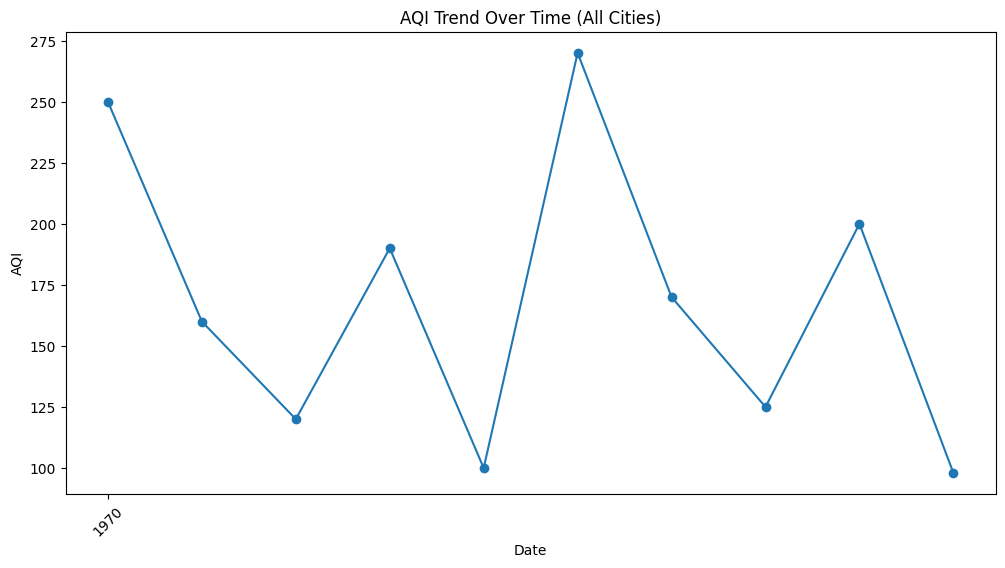

/tmp/ipython-input-2282019621.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette="viridis")


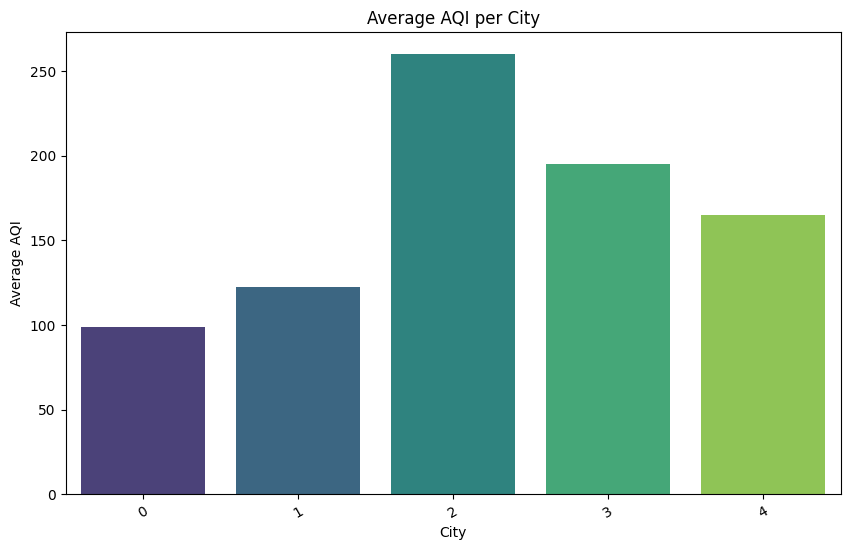

In [20]:

# Extra Visualization: AQI Trends
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['AQI'], marker='o')
plt.title("AQI Trend Over Time (All Cities)")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.xticks(rotation=45)
plt.show()
city_avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=city_avg_aqi.index, y=city_avg_aqi.values, palette="viridis")
plt.title("Average AQI per City")
plt.xlabel("City")
plt.ylabel("Average AQI")
plt.xticks(rotation=30)
plt.show()
